## Analyse av topp 10 dager med høyest temperatur 

*Resultatet viser de ti varmeste dagene i Oslo over 12 år (2010-2022) hvor dataen er hentet fra frostAPI.*

**Observasjoner:**
Vi kan se at flertallet av de varmeste dagene har forekommet etter 2014 hvorav 2018 og 2019 er sterkest representert (4 av 10 dager). Flere av dagene hadde ingen nedbør, noe som ofte gir sterk soloppvarming (samsvarer altså med den høye temperaturen).

**Analyse:**
Resultatet tyder på at de aller varmeste dagene har forekomemt hyppigere i nyere tid noe som er en indkikator på klimaendringer.

         Dato  Nedbør  Temperatur  Vindhastighet
0  2018-07-28     0.0        28.0            4.5
1  2019-07-27     0.0        26.6            3.1
2  2014-07-24     0.0        25.8            1.9
3  2014-07-26     0.0        25.6            2.0
4  2018-07-18     0.0        25.5            1.7
5  2019-07-28     0.3        24.9            3.8
6  2019-07-29     0.5        24.8            2.3
7  2014-07-10     0.0        24.7            2.1
8  2020-06-20     0.0        24.7            3.2
9  2018-07-12     0.0        24.6            2.4


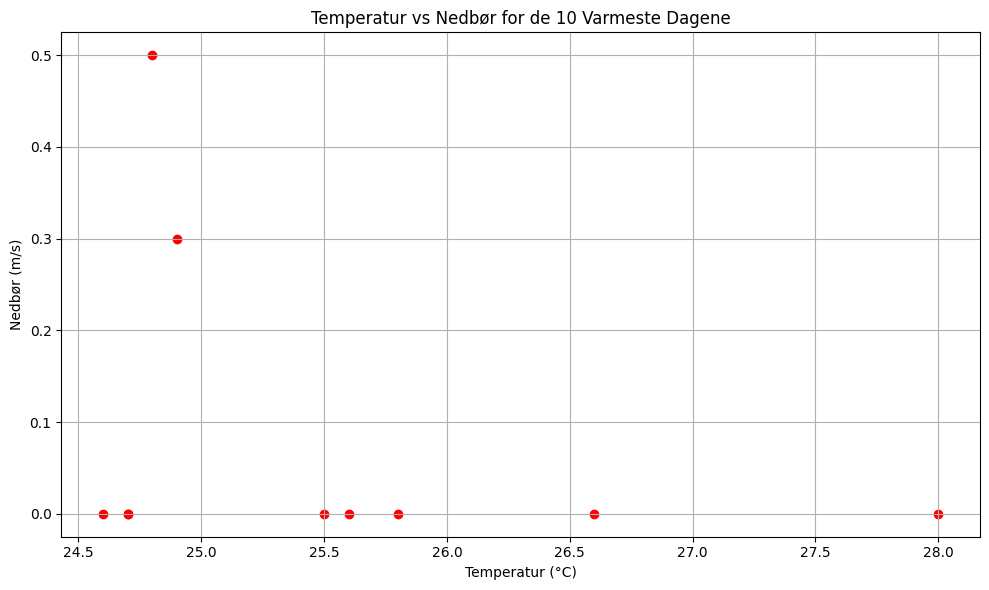

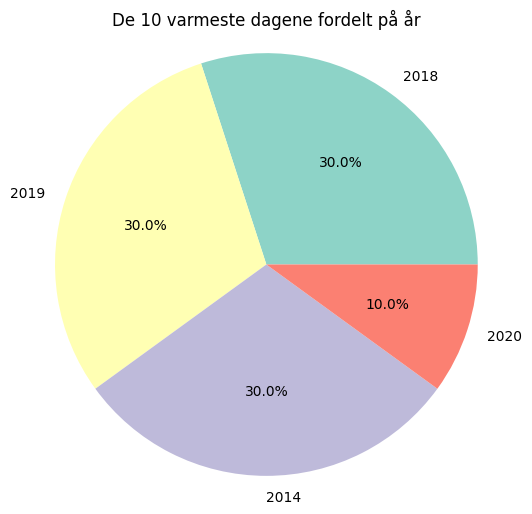

In [53]:
# Importerer nødvendige biblioteker 
import pandas as pd
import pandasql as psql

# Laster inn data
file_name = "../data/raw_data/frostAPI_data.json"  
data = pd.read_json(file_name)

# Konverterer dataene til en Pandas DataFrame
df = pd.DataFrame(data)

# SQL-spørring for å finne de 10 dagene med høyest temperatur
query = """
    SELECT * 
    FROM df 
    ORDER BY Temperatur DESC 
    LIMIT 10
"""

result = psql.sqldf(query, locals())
print(result)


# Visualisering med scatterplot av temp vs nedbør
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(result['Temperatur'], result['Nedbør'], color='red', marker='o')
plt.title('Temperatur vs Nedbør for de 10 Varmeste Dagene')
plt.xlabel('Temperatur (°C)')
plt.ylabel('Nedbør (m/s)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Kakediagram for å vise fordelingen av de 10 varmeste dagene etter år
# Legger til en kolonne med år
result['År'] = pd.to_datetime(result['Dato']).dt.year

# Teller hvor mange ganger hvert år forekommer
år_telling = result['År'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    år_telling,
    labels=år_telling.index,
    autopct='%1.1f%%',
    colors=plt.cm.Set3.colors 
)
plt.title("De 10 varmeste dagene fordelt på år")
plt.axis('equal')
plt.show()

## Analyse av topp 10 dager med lavest temperatur

*Resultatet viser de ti kaldeste dagene i Oslo over 12 år (2010-2022) hvor dataen er hentet fra frostAPI.*

**Observasjoner:**
Fire av de 10 kaldeste dagene stammer fra 2010, noe som indikerer en spesielt kald vinter. Ellers kan vi se at den siste av de kaldeste dagene var i 2016.

**Analyse:**
Fraværet av ekstreme kuldedager i senere år kan indikere et gradvis varmere klima - Oslo opplever flere mildere vintere nå enn tidligere.

         Dato  Temperatur
0  2010-12-22       -15.7
1  2010-12-23       -14.1
2  2013-01-14       -14.0
3  2010-12-08       -13.8
4  2013-01-23       -13.6
5  2010-12-09       -13.2
6  2011-02-13       -13.1
7  2011-02-21       -13.1
8  2016-01-15       -13.0
9  2012-12-04       -12.9


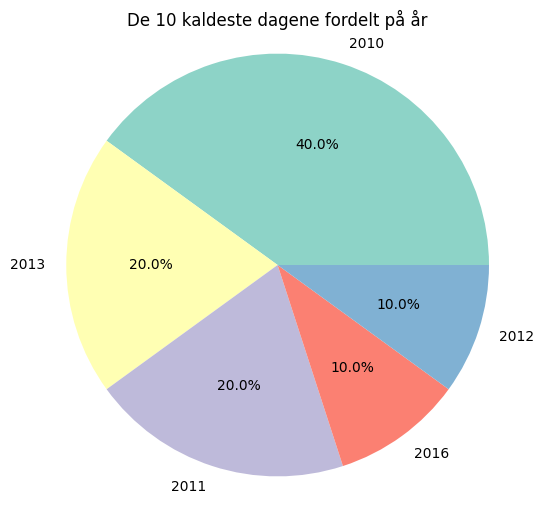

In [58]:
# SQL-spørring for å finne de 10 dagene med lavest temperatur
query = """
    SELECT Dato, Temperatur
    FROM df 
    ORDER BY Temperatur ASC 
    LIMIT 10
"""

result = psql.sqldf(query, locals())
print(result)



# Kakediagram for å vise fordelingen av de 10 kaldeste dagene etter år
# Legger til en kolonne med år
result['År'] = pd.to_datetime(result['Dato']).dt.year

# Teller hvor mange ganger hvert år forekommer blant de kaldeste dagene
år_telling = result['År'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(
    år_telling,
    labels=år_telling.index,
    autopct='%1.1f%%',
    colors=plt.cm.Set3.colors 
)
plt.title("De 10 kaldeste dagene fordelt på år")
plt.axis('equal')
plt.show()


## Analyse av gjennomsnittlig temperatur per år 

*Resultatet viser gjennnomsnittstemperaturen per år i Oslo over 12 år (2010-2022) hvor dataen er hentet fra frostAPI.*

**Generell trend:**
Gjennomsnittstemperaturen per år i Oslo ser ut til å ha holdt seg relatvit stabilt de siste årene (et stabilt resultat på mellom 6 og 8 grader celcius). Dette kan indikere et relativt stabilit klima. 

**Avvik:**
Det ekstreme avviket i 2022 skyldes trolig at i 2022 har vi kun data fram til 03.april. Det er også viktig å ta i betraktning at i 2010 har vi bare data fra 01.april og så ut året. 

      År  Gjennomsnitt_temperatur
0   2010                 8.050182
1   2011                 7.441370
2   2012                 6.578689
3   2013                 6.768767
4   2014                 8.344384
5   2015                 7.674795
6   2016                 7.279508
7   2017                 6.992329
8   2018                 7.789863
9   2019                 7.312877
10  2020                 8.712022
11  2021                 7.286301
12  2022                 0.950000


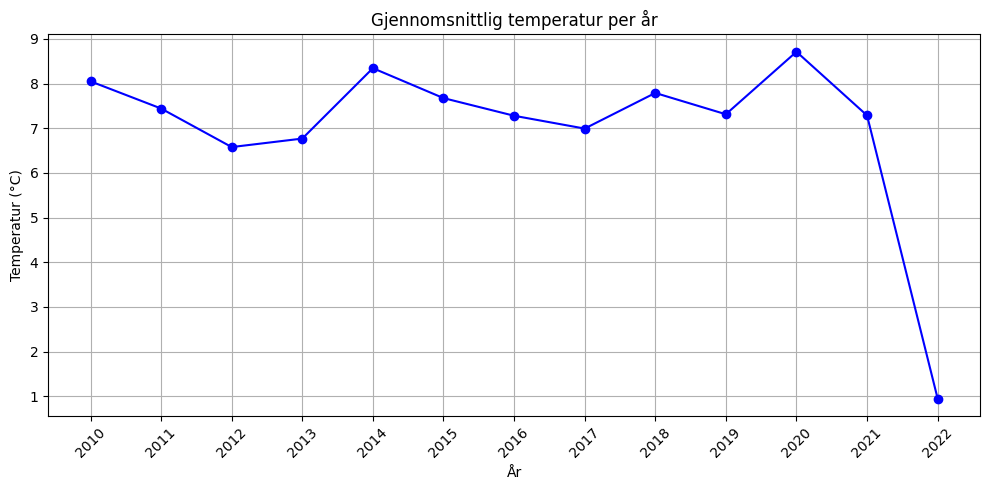

In [54]:
# SQL-spørring for å finne gjennomsnittlig temperatur per år
query = """
    SELECT strftime('%Y', Dato) AS År,
           AVG(Temperatur) AS Gjennomsnitt_temperatur
    FROM df
    GROUP BY År
    ORDER BY År
"""

result = psql.sqldf(query, locals())
print(result)


# Visualisering av gjennomsnittlig temperatur per år

plt.figure(figsize=(10, 5))
plt.plot(result['År'], result['Gjennomsnitt_temperatur'], marker='o', color='blue', linestyle='-')
plt.title("Gjennomsnittlig temperatur per år")
plt.xlabel("År")
plt.ylabel("Temperatur (°C)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Gjennomsnittlig nedbør, temperatur og vindhastighet per uke 

*Viser gjennomsnittlig nedbør, temperatur og vindhastighet per uke i Oslo fra 2010-2022.*


In [ ]:
# Importerer nødvendige biblioteker 
import pandas as pd
import pandasql as psql

# Laster inn data
file_name = "../data/raw_data/frostAPI_data.json"  
data = pd.read_json(file_name)

# Konverterer dataene til en Pandas DataFrame
df = pd.DataFrame(data)

# Legger til en kolonne for uke
df['Uke'] = pd.to_datetime(df['Dato']).dt.strftime('%Y-U%U')

# SQL-spørring for å beregne gjennomsnitt per uke
query = """
    SELECT
        Uke,
        AVG(Nedbør) AS Avg_Nedbør,
        AVG(Temperatur) AS Avg_Temperatur,
        AVG(Vindhastighet) AS Avg_Vindhastighet
    FROM df
    GROUP BY Uke
    ORDER BY Uke
"""
result = psql.sqldf(query, locals())
result

,Uke,Avg_Nedbør,Avg_Temperatur,Avg_Vindhastighet
0,2010-U13,13.633333,3.000000,2.300000
1,2010-U14,0.642857,4.985714,2.300000
2,2010-U15,0.057143,7.728571,2.757143
3,2010-U16,0.014286,4.571429,2.671429
4,2010-U17,2.228571,7.742857,2.157143
...,...,...,...,...
632,2022-U09,0.085714,2.042857,2.314286
633,2022-U10,0.042857,0.542857,1.771429
634,2022-U11,0.342857,2.685714,2.042857
635,2022-U12,0.000000,4.671429,2.085714


## Ny markdown - korrelasjon osv

      Temperatur   Verdi_O3
0           25.8  38.750000
1           25.6  46.554167
2           24.7  47.904167
3           24.5  50.766667
4           24.1  53.200000
...          ...        ...
1895       -13.0   7.184211
1896       -13.1  58.462500
1897       -13.1  34.925000
1898       -13.6  21.062500
1899       -14.0  25.820833

[1900 rows x 2 columns]
      Vindhastighet   Verdi_NO2
0               8.7   11.958333
1               8.5   12.545455
2               7.9   14.545833
3               7.5    7.129167
4               7.4   15.312500
...             ...         ...
2266            0.6  140.837500
2267            0.6   78.366667
2268            0.6   78.195833
2269            0.6  115.916667
2270            0.6   48.716667

[2271 rows x 2 columns]
Korrelasjon mellom Temperatur og O3: 0.4014031572920203
Korrelasjon mellom Vindhastighet og NO2: -0.570403062771922


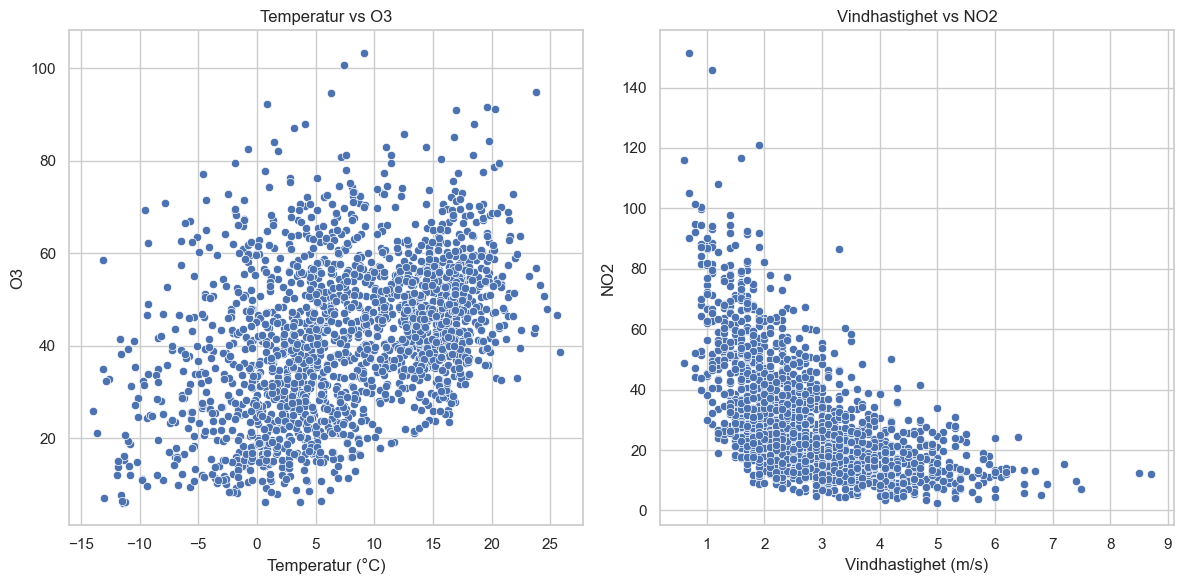

In [ ]:
import json
# Lese inn de to JSON-filene
with open("../data/raw_data/frostAPI_data.json", "r") as frost, open("../data/raw_data/raw_air_quality_nilu_oslo.json", "r") as nilu:
    data1 = json.load(frost)
    data2 = json.load(nilu)

# Konvertere til DataFrames
df1 = pd.json_normalize(data1)
df2 = pd.json_normalize(data2)

merged_df = pd.merge(df1, df2, on="Dato", how="inner")  

# SQL-spørring for å undersøke sammenhengen mellom temperatur og O3-nivå
query = """
SELECT Temperatur, Verdi_O3
FROM merged_df
WHERE Temperatur IS NOT NULL AND Verdi_O3 IS NOT NULL
ORDER BY Temperatur DESC
"""
result = psql.sqldf(query, locals())
print(result)

# SQL-spørring for å undersøke sammenhengen mellom vindhastighet og NO2-nivå
query2 = """
SELECT Vindhastighet, Verdi_NO2
FROM merged_df
WHERE Vindhastighet IS NOT NULL AND Verdi_NO2 IS NOT NULL
ORDER BY Vindhastighet DESC
"""
result2 = psql.sqldf(query2, locals())
print(result2)

## Variasjon i værdata: Standardvik for nedbør, temperatur og vindhastighet

*Regner standardavviket til hele datasettet og standardavvik per uke (frostAPI) for nedbør, temperatur og vindhastighet.*

Standardavvik gir en indikasjon på hvor mye variasjon det er i værdataen.


In [30]:
# Importerer nødvendige biblioteker 
import pandas as pd
import pandasql as psql

# Laster inn data
file_name = "../data/raw_data/frostAPI_data.json"  
data = pd.read_json(file_name)

# Konverterer dataene til en Pandas DataFrame
df = pd.DataFrame(data)

# SQL-spørring for å beregne standardavvik for hele datasettet
query = """
    SELECT
        SQRT(SUM((Nedbør - (SELECT AVG(Nedbør) FROM df)) * 
                  (Nedbør - (SELECT AVG(Nedbør) FROM df))) / 
                  (COUNT(Nedbør) - 1)) AS StdDev_Nedbør,
        SQRT(SUM((Temperatur - (SELECT AVG(Temperatur) FROM df)) * 
                  (Temperatur - (SELECT AVG(Temperatur) FROM df))) / 
                  (COUNT(Temperatur) - 1)) AS StdDev_Temperatur,
        SQRT(SUM((Vindhastighet - (SELECT AVG(Vindhastighet) FROM df)) * 
                  (Vindhastighet - (SELECT AVG(Vindhastighet) FROM df))) / 
                  (COUNT(Vindhastighet) - 1)) AS StdDev_Vindhastighet
    FROM df
"""
result = psql.sqldf(query, locals())
result

,StdDev_Nedbør,StdDev_Temperatur,StdDev_Vindhastighet
0,5.241123,7.932812,1.159046


In [59]:
# Importerer nødvendige biblioteker 
import pandas as pd
import pandasql as psql

# Laster inn data
file_name = "../data/raw_data/frostAPI_data.json"  
data = pd.read_json(file_name)

# Konverterer dataene til en Pandas DataFrame
df = pd.DataFrame(data)

# Legger til en kolonne for uke
df['Uke'] = pd.to_datetime(df['Dato']).dt.strftime('%Y-U%U')

# SQL-spørring for å beregne standardavvik per uke
query = """
    SELECT
        Uke,
        SQRT(SUM((Nedbør - (SELECT AVG(Nedbør) FROM df WHERE Uke = df.Uke)) * 
                  (Nedbør - (SELECT AVG(Nedbør) FROM df WHERE Uke = df.Uke))) / 
                  (COUNT(Nedbør) - 1)) AS StdDev_Nedbør,
        SQRT(SUM((Temperatur - (SELECT AVG(Temperatur) FROM df WHERE Uke = df.Uke)) * 
                  (Temperatur - (SELECT AVG(Temperatur) FROM df WHERE Uke = df.Uke))) / 
                  (COUNT(Temperatur) - 1)) AS StdDev_Temperatur,
        SQRT(SUM((Vindhastighet - (SELECT AVG(Vindhastighet) FROM df WHERE Uke = df.Uke)) * 
                  (Vindhastighet - (SELECT AVG(Vindhastighet) FROM df WHERE Uke = df.Uke))) / 
                  (COUNT(Vindhastighet) - 1)) AS StdDev_Vindhastighet
    FROM df
    GROUP BY Uke
    ORDER BY Uke
"""
result = psql.sqldf(query, locals())
result

,Uke,StdDev_Nedbør,StdDev_Temperatur,StdDev_Vindhastighet
0,2010-U13,19.379106,5.356527,0.782895
1,2010-U14,2.250513,2.958045,1.141659
2,2010-U15,2.539415,0.884271,1.331183
3,2010-U16,2.581478,3.335648,0.595125
4,2010-U17,4.667436,1.544210,0.879543
...,...,...,...,...
632,2022-U09,2.514298,5.922081,0.982191
633,2022-U10,2.551554,7.543182,1.156790
634,2022-U11,2.404014,5.111449,0.896157
635,2022-U12,2.596632,3.664936,1.083375
